# WeatherPy
----

#### Analysis
* The highest temperatures in the world seem to be located a little north of the equator. 

* The Southern Hemisphere max temp is higher then north due to seasonal positioning of the globe. 

* There does not seem to be any correlation between the cities geolocation and the amount of humidity it receives.

* The closer you get to the equator, the less wind (mph) there is.

In [3]:
# pip install citipy

  Using cached https://files.pythonhosted.org/packages/3b/d0/59721d0f3954781488aac17ee4a40412d0a3547e98bb16377a09c39a2807/citipy-0.0.5.tar.gz
  Using cached https://files.pythonhosted.org/packages/00/3d/bd727d025b1706798aae14da3f69fc7d5a8639dc9e0eba37c7dcd43eb03e/kdtree-0.16-py2.py3-none-any.whl
  Created wheel for citipy: filename=citipy-0.0.5-cp37-none-any.whl size=559703 sha256=67ad5dec925dfee6feec0adfe64c51f8e028bac52918151913a6dcb217525603
  Stored in directory: /Users/tj/Library/Caches/pip/wheels/6f/07/0d/0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Empty Lists
x=1
count=1
city_df=[]
lat=[] 
long=[]
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Country=[]
Date=[]


#Base line information
url= f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}&q="
city_responses= [ ]

#Beggining Print
print("Beginning Data Retrieval")
print("------------------------")

#for loop to make a api request for each city. 
for city in cities:
    if x >= 51: 
        count+= 1
        x=1
    try:
        city_data=requests.get(url + city).json()
        city_df.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        long.append(city_data['coord']['lon'])
        Max_Temp.append(city_data['main']['temp_max'])
        Humidity.append(city_data['main']["humidity"])
        Cloudiness.append(city_data["clouds"]['all'])
        Wind_Speed.append(city_data["wind"]['speed'])
        Country.append(city_data['sys']['country'])
        Date.append(city_data['dt'])
        city_responses.append(city_data)
        print(f"Processing Record {x} of set {count}|{city}")
        x+=1
    except: 
        print("City not found. Skipping... ")
        
#Final Print
print("------------------------")
print("Data Retrieval Complete ")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of set 1|tukrah
City not found. Skipping... 
Processing Record 2 of set 1|dikson
Processing Record 3 of set 1|chuy
Processing Record 4 of set 1|jamestown
Processing Record 5 of set 1|vaini
Processing Record 6 of set 1|rikitea
Processing Record 7 of set 1|chokurdakh
Processing Record 8 of set 1|port alfred
Processing Record 9 of set 1|jalpa
Processing Record 10 of set 1|harper
Processing Record 11 of set 1|ushuaia
Processing Record 12 of set 1|faanui
Processing Record 13 of set 1|san andres
Processing Record 14 of set 1|bethel
Processing Record 15 of set 1|antofagasta
City not found. Skipping... 
Processing Record 16 of set 1|sitka
Processing Record 17 of set 1|pudozh
Processing Record 18 of set 1|tuatapere
Processing Record 19 of set 1|albany
Processing Record 20 of set 1|coihaique
Processing Record 21 of set 1|leningradskiy
Processing Record 22 of set 1|cherskiy
City not found. Skipping... 
Processing Record 23 of s

Processing Record 46 of set 4|kirakira
Processing Record 47 of set 4|hobyo
Processing Record 48 of set 4|goderich
Processing Record 49 of set 4|ixtapa
Processing Record 50 of set 4|calama
Processing Record 1 of set 5|junin
Processing Record 2 of set 5|susehri
Processing Record 3 of set 5|saskatoon
Processing Record 4 of set 5|saint-philippe
Processing Record 5 of set 5|actopan
Processing Record 6 of set 5|victoria
Processing Record 7 of set 5|mongoumba
Processing Record 8 of set 5|glenwood springs
Processing Record 9 of set 5|sinnamary
Processing Record 10 of set 5|camacha
Processing Record 11 of set 5|havelock
Processing Record 12 of set 5|ostrovnoy
Processing Record 13 of set 5|nelson bay
Processing Record 14 of set 5|leiyang
Processing Record 15 of set 5|clyde river
Processing Record 16 of set 5|kaeo
Processing Record 17 of set 5|chandbali
Processing Record 18 of set 5|duxbury
Processing Record 19 of set 5|roma
Processing Record 20 of set 5|tawang
Processing Record 21 of set 5|hofn


Processing Record 42 of set 8|renqiu
City not found. Skipping... 
Processing Record 43 of set 8|guane
Processing Record 44 of set 8|poopo
Processing Record 45 of set 8|zimovniki
Processing Record 46 of set 8|leeton
Processing Record 47 of set 8|eureka
Processing Record 48 of set 8|kimbe
Processing Record 49 of set 8|belyy yar
Processing Record 50 of set 8|karratha
City not found. Skipping... 
Processing Record 1 of set 9|prabumulih
Processing Record 2 of set 9|maun
Processing Record 3 of set 9|roebourne
Processing Record 4 of set 9|pisco
Processing Record 5 of set 9|south sioux city
City not found. Skipping... 
Processing Record 6 of set 9|saint stephen
Processing Record 7 of set 9|la asuncion
Processing Record 8 of set 9|toronto
Processing Record 9 of set 9|manaquiri
City not found. Skipping... 
Processing Record 10 of set 9|hamilton
Processing Record 11 of set 9|jimma
Processing Record 12 of set 9|lata
Processing Record 13 of set 9|teahupoo
Processing Record 14 of set 9|lethem
Proces

In [4]:
#Make into a DataFrame

main_df=pd.DataFrame({"City": city_df, "Lat": lat, "Lng": long, 
                      "Max Temp": Max_Temp, "Humidity": Humidity, 
                      "Cloudiness":Cloudiness, "Wind Speed": Wind_Speed,
                     "Country": Country, "Date": Date})

main_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tūkrah,32.53,20.58,63.21,83,4,12.73,LY,1587672213
1,Dikson,73.51,80.55,35.76,84,100,24.85,RU,1587672214
2,Chui,-33.70,-53.46,66.25,88,14,11.48,UY,1587672214
3,Jamestown,42.10,-79.24,53.60,54,75,3.36,US,1587672214
4,Vaini,-21.20,-175.20,77.00,94,75,5.82,TO,1587672214


In [5]:
#Count each column to ensure that they are equal

main_df.count()

City          538
Lat           538
Lng           538
Max Temp      538
Humidity      538
Cloudiness    538
Wind Speed    538
Country       538
Date          538
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#There is no data where humidity is over 100%
main_df["Humidity"].max()

#This is how I would create the dataframe though

main_df=main_df[main_df["Humidity"]<= 100]

main_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,538.000000,538.000000,538.000000,538.00000,538.000000,538.000000,5.380000e+02
mean,20.394981,19.139498,59.641357,68.47026,55.198885,8.409257,1.587672e+09
std,33.992947,91.031435,20.451726,21.68438,37.857906,5.856785,6.897289e+01
min,-54.800000,-179.170000,-2.200000,5.00000,0.000000,0.200000,1.587672e+09
25%,-8.457500,-61.832500,44.600000,57.00000,17.000000,4.165000,1.587672e+09
50%,24.695000,23.425000,62.010000,74.00000,70.500000,6.930000,1.587672e+09
75%,49.455000,100.422500,77.685000,85.75000,90.000000,11.410000,1.587672e+09
max,78.220000,179.320000,95.720000,100.00000,100.000000,44.740000,1.587672e+09


In [7]:
# Export the City_Data into a csv
main_df.to_csv(output_data_file, index_label= "city_id")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

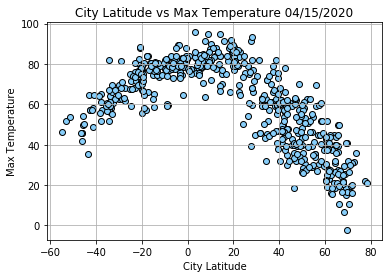

In [8]:
#New (x,y) Variables
latitude=main_df["Lat"]
Max_T=main_df["Max Temp"]

#Making Scatter Plot
plt.scatter(latitude, Max_T, marker="o", facecolors="lightskyblue", edgecolors="black")

#Formatting
plt.grid()
plt.title("City Latitude vs Max Temperature 04/15/2020")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature")
plt.savefig("../output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

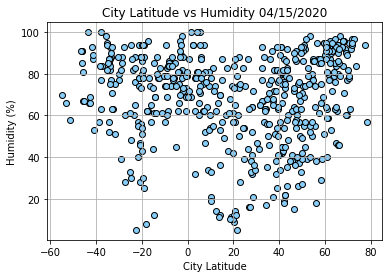

In [9]:
#New (y) variable
Humidity_data=main_df["Humidity"]

#Making Scatter Plot
plt.scatter(latitude, Humidity_data, marker="o", facecolors="lightskyblue", edgecolors="black")

#Formatting
plt.grid()
plt.title("City Latitude vs Humidity 04/15/2020")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")

#Saving the graph to a PNG
plt.savefig("../output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

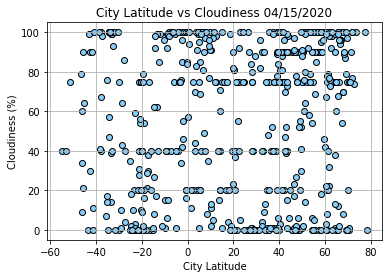

In [22]:
#New (y) variable
Cloud_data=main_df["Cloudiness"]

#Making Scatter Plot
plt.scatter(latitude, Cloud_data, marker="o", facecolors="lightskyblue", edgecolors="black")

#Formatting
plt.grid()
plt.title("City Latitude vs Cloudiness 04/15/2020")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")

#Saving the graph to a PNG
plt.savefig("../output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

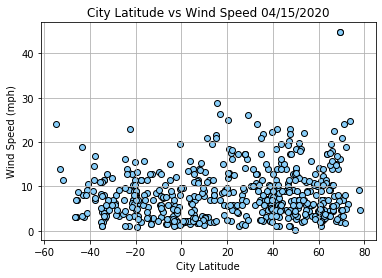

In [11]:
#New (y) variable
Wind_data=main_df["Wind Speed"]

#Making Scatter Plot
plt.scatter(latitude, Wind_data, marker="o", facecolors="lightskyblue", edgecolors="black")

#Formatting
plt.grid()
plt.title("City Latitude vs Wind Speed 04/15/2020")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/Fig4.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames
Northern_df=main_df[main_df["Lat"]>0]
Southern_df=main_df[main_df["Lat"]<0]

In [13]:
#Practice
def plot_linear_regression(x,y,title,text_coordinates):
    (slope, intercept,rvalue, pvalue, stderr)= linregress(x,y)
    regress_values= x*slope + intercept
    line_eq=f"y={round(slope,2)}x + {round(intercept,2)}"
    plt.scatter(x, y, marker="o", facecolors="lightskyblue", edgecolors="black")
    plt.plot(x, regress_values, color='red')
    plt.annotate(line_eq, text_coordinates, color='red', fontsize= 14)
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.show()
    print(f"The r-squared is: {rvalue**2}")


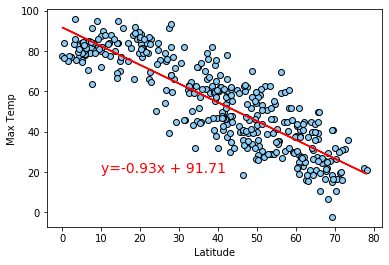

The r-squared is: 0.7433653488198326


In [14]:
plot_linear_regression(Northern_df["Lat"], Northern_df["Max Temp"], "Max Temp",(10,20))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

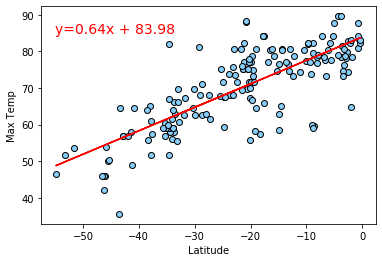

The r-squared is: 0.6115455958227164


In [15]:
plot_linear_regression(Southern_df["Lat"], Southern_df["Max Temp"], "Max Temp",(-55,85))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

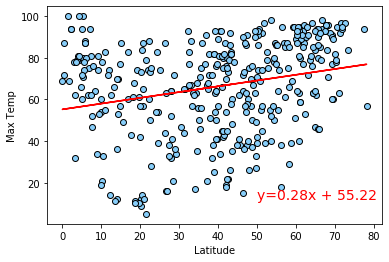

The r-squared is: 0.06136827983340087


In [16]:
plot_linear_regression(Northern_df["Lat"], Northern_df["Humidity"], "Max Temp",(50,12))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

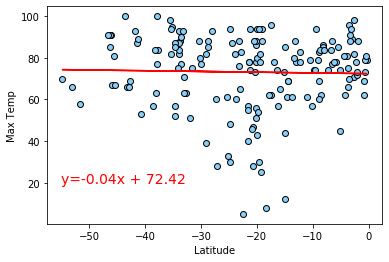

The r-squared is: 0.0006724519639903774


In [17]:
plot_linear_regression(Southern_df["Lat"], Southern_df["Humidity"], "Max Temp",(-55,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

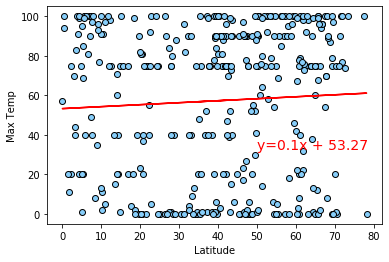

The r-squared is: 0.0029126111484385373


In [18]:
plot_linear_regression(Northern_df["Lat"], Northern_df["Cloudiness"], "Max Temp",(50,33))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

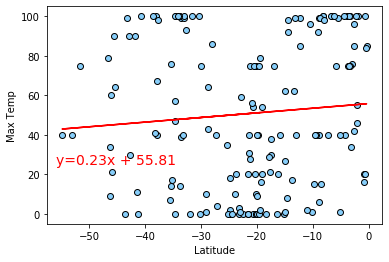

The r-squared is: 0.006953714257533255


In [19]:
plot_linear_regression(Southern_df["Lat"], Southern_df["Cloudiness"], "Max Temp",(-56,25))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

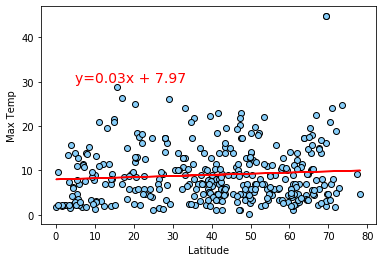

The r-squared is: 0.0067558547868762885


In [20]:
plot_linear_regression(Northern_df["Lat"], Northern_df["Wind Speed"], "Max Temp",(5,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

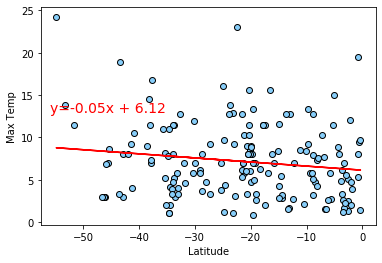

The r-squared is: 0.02233594273457048


In [21]:
plot_linear_regression(Southern_df["Lat"], Southern_df["Wind Speed"], "Max Temp",(-56,13))